    email -> content -> classification  -> [ spam, ham ]
    
    domains -> sender's email -> sender's domain
    
    application based rules -> lists of domains which are used to send spam 
    
    time -> 

    corpus, WordtoVector

text data
    
Stop Word Removal

Stemming, Lemmatization

Vectorize

TF/IDF

    pip install wordcloud
    pip install nltk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline 

plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.labelsize'] = 20

In [2]:
data = pd.read_csv('spam.csv', usecols=[0, 1], encoding='latin')
data.rename({'v1': 'label', 'v2': 'message'}, axis=1, inplace=True)

In [3]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
corpus = data['message'].values

In [5]:
c = 0
for m in corpus:
    print(m)
    c += 1
    if c == 5:
        break

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [6]:
def process_string(corpus):
    i = 0
    while i < len(corpus):
        msg = corpus[i]
        corpus[i] = msg.lower()
        i += 1
    return " ".join(corpus)
    

In [7]:
string = process_string(corpus)

In [8]:
words = pd.Series(string.split())

    MOST COMMONS WORDS KNOWN AS STOP WORDS

In [9]:
data.shape

(5572, 2)

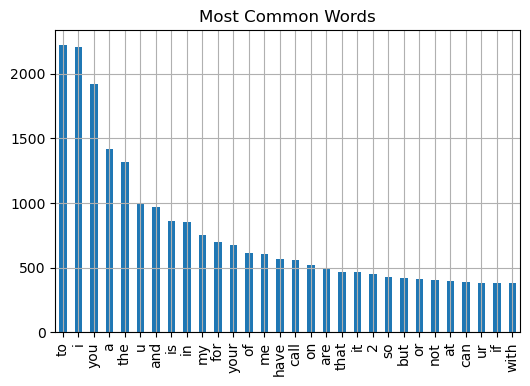

In [10]:
plt.title('Most Common Words')
words.value_counts()[:30].plot(kind='bar')
plt.grid()
plt.show()

### Word Count

    if high frequency is there it means that is a common value in that document

    sci-fic -> terminology 
    
    Drama -> vocab
    
    hackers chat -> tools which are used by hackers

In [11]:
from nltk.corpus import stopwords

In [12]:
stopwords = stopwords.words('english') # ML -> nltk -> hindi

In [13]:
def process_string(corpus, stopwords=[]):
    i = 0
    while i < len(corpus):
        msg = corpus[i].lower()
        sentance = []
        for word in msg.split():
            if word not in stopwords:
                sentance.append(word)
        msg = " ".join(sentance)
        msg = re.sub(r"[!\"#$%&\'()*+,-.:;<=>?@\[\\\]^_`{|}~]", "",msg)
        corpus[i] = msg
        
        i += 1
    return " ".join(corpus)
    

In [14]:

info = process_string(corpus)

NameError: name 're' is not defined

In [ ]:
import string
string.punctuation

In [ ]:

stopwords += ['r', 'n', "dont", 'u', '2', 'ur', "i'm",  '4', '...', 'ok', "i'll"] + list(string.punctuation)

In [ ]:
info = process_string(corpus)
pd.Series(info.split()).value_counts()[:30].plot(kind='bar')
plt.show()

In [ ]:
import re

In [ ]:
string.punctuation

In [ ]:
msg =  "hel:lo....@$#%% how are you+*"
re.sub(r"[!\"#$%&\'()*+,-.:;<=>?@\[\\\]^_`{|}~]", "",msg)

In [ ]:
def process_string(msg):
    msg = msg.lower()
    sentance = []
    for word in msg.split():
        if word not in stopwords:
            sentance.append(word)
    msg = " ".join(sentance)
    msg = re.sub(r"[!\"#$%&\'()*+,-.:;<=>?@\[\\\]^_`{|}~]", "",msg)
    
    return msg
    

In [ ]:
data['message'] = data['message'].apply(process_string)

In [ ]:
ham = data[data['label'] == 'ham']
spam= data[data['label'] == 'spam']

In [ ]:
ham.head()

In [ ]:
spam.head()

In [ ]:
ham_string =  pd.Series([ word for value in ham['message'].values for word in value.split() ])
spam_string = pd.Series([ word for value in spam['message'].values for word in value.split() ])

In [ ]:
plt.rcParams['xtick.labelsize'] = 5

In [ ]:
plt.rcParams['axes.labelsize'] = 5

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)
ham_string.value_counts()[:30].plot(kind='bar', ax=ax1, label='HAM', color='blue')
spam_string.value_counts()[:30].plot(kind='bar', ax=ax2, label='SPAM', color='red')
ax1.legend()
ax2.legend()
plt.grid(ls='--', alpha=0.2)
plt.show()

In [ ]:
ln1 = np.mean([ len(msg.split()) for msg in ham['message'].values ])
ln2 = np.mean([ len(msg.split()) for msg in spam['message'].values ])
plt.bar(["Ham", "Spam"], [ln1, ln2], color=['blue', 'red'] )
plt.show()

In [ ]:
ln1 = np.mean([ len(msg) for msg in ham['message'].values ])
ln2 = np.mean([ len(msg) for msg in spam['message'].values ])
plt.bar(["Ham", "Spam"], [ln1, ln2], color=['blue', 'red'] )
plt.show()

In [ ]:
data['length'] = data['message'].apply(lambda v: len(v))
data.head()

In [15]:
data.groupby('label')['length'].describe().T

KeyError: 'Column not found: length'

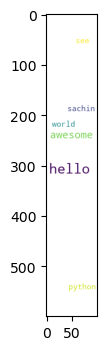

In [16]:
word_cloud = WordCloud(background_color='white', width=100, height=600)

s = "hello hello this awesome hello  hello awesome python world see sachin it"

plt.imshow(word_cloud.generate_from_text(s), )
plt.show()

In [17]:
word_cloud = WordCloud(background_color='white', width=1000, height=600)


In [18]:
wc = word_cloud.generate_from_text(" ".join(ham_string.values))
plt.imshow(wc)
plt.axis('off')
plt.show()

NameError: name 'ham_string' is not defined

In [ ]:
wc = word_cloud.generate_from_text(" ".join(spam_string.values))
plt.imshow(wc)
plt.axis('off')
plt.show()

#### Stemming



    PorterStemmer    -> old technique
    
    LancasterStemmer -> more aggressive than PorterStemmer
    
    SnowballStemmer  -> for non english languages

    stem -> Root

    stemming -> finding root word by removing prefixes and suffixes from a word

    flying --> fly

    flyer  --> fly

    Stemming Algorithms works on pre-define rules, and the just detect suffix and prefix patterns in data and remove them  

**note**: after stemming we can get a word which is not a english or langauge word

In [19]:
#nltk.download() # menu -> punkt, 

In [20]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

In [21]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [22]:
porter.stem('cats')

'cat'

In [23]:
porter.stem('flying') # fli

'fli'

    database -> root words 
    
    it will be very time consuming 

In [24]:
[ porter.stem(word) for word in ['fly', 'flying', 'flyer', 'flew', 'flown']]

['fli', 'fli', 'flyer', 'flew', 'flown']

In [25]:
[ lancaster.stem(word) for word in ['fly', 'flying', 'flyer', 'flew', 'flown']]

['fly', 'fly', 'fly', 'flew', 'flown']

### Lemmatization 

    converting word into it's root format

In [26]:
from nltk.stem import WordNetLemmatizer

In [30]:
lemma = WordNetLemmatizer()

In [38]:
# Part of Speech # sub verb object, noun, verbs
[ lemma.lemmatize(word, pos='v') for word in ['dogs', 'fly', 'flying', 'flyer', 'flew', 'flown',
                                    'was', 'are', 'were']]


['dog', 'fly', 'fly', 'flyer', 'fly', 'fly', 'be', 'be', 'be']

### IR - Information Retrieval

### Similir Document 

    feature -> distance 
    
    
    d1(25, 70)   d2(50, 60) d3(50, 65)

    vectorization = [ 0, 1, 1, 1, 2, 2, 0, 0, 0, 0 , 0, 0, 0, 0]

    "hello how are you?"

    "this is not good"
    
    
    "you are a good person"
    
    "you are bad person"

#### TF/IDF

    Term Frequency

    vocab = [ w1, w2, w3, .................... wn]

    d1   =  [ 3,  2,  0, ..................... 1]
    
    
    0 - 1

    'hello hello hello hello'

    4 / 4

    "hello hello hello hello world"


    hello -> 4 world -1
    
    hello -> 4/5 0.8 world -> 1 / 5 (0.2)

In [43]:
1000 / 2500 # 2D -> fix columns

0.4

In [41]:
4/5

0.8

    is - ? 

### Term Frequency

        Normalize your word frequency

$$\text {tf} = \frac {\text {frequency of term t in document} } { \text {total terms in document} }$$

### Document Frequency

$$ df = \frac {\text {frequency of term t in all documents (corpus)} } { \text { total no of documents in corpus }} $$

### IDF 

    Inverse Document Frequency
    
    
    IDF =  N / df

    10000 / 0 -> infinity

    df = 10 / 10 -> 1
    
    1 / low -> high
    
    1 / high -> low 

$$IDF = log ( \frac {N}  {df+1} ) $$

    10000/ 0 + 1 -> 10000
    
    
    10000 / 10000 -> 1 -> 
    
    10000 / 100 -> 1000 -> 

### TF/IDF Score

    (tf*idf) -> importance of word in document as well in whole corpus

In [ ]:
[ 1, 0, 2, 4, 0, 3, 0]

[ tf*IDF ]

    most common words are usually stop words

    t = 'hello'
    
    m1 = "hello this is good let's do something hello" # tf -> 2 / 8 -> importance of hello in m1 document

    m2 = "hello good job this is great hello hello"  # tf -> 3 / 8 -> importance of hello in m2 document
    
    m3 = "hello let's do it" # tf = 0
    
    m4 = "hello python is awesome" # tf = 0
    
    
    
    df = 4 / 4 -> 1

In [65]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [60]:
documents = [ 'hello world how are you', 'this is awesome', 'hello hi bye bye',
            'hello world how you doing', 'python is awesome']

In [61]:
vector = CountVectorizer()
vector.fit_transform(documents).toarray()

array([[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]], dtype=int64)

In [62]:
tfidf = TfidfVectorizer()

In [63]:
tfidf.fit_transform(documents).toarray()

array([[0.54222553, 0.        , 0.        , 0.        , 0.36313476,
        0.        , 0.43746414, 0.        , 0.        , 0.        ,
        0.43746414, 0.43746414],
       [0.        , 0.53177225, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.53177225, 0.        , 0.659118  ,
        0.        , 0.        ],
       [0.        , 0.        , 0.85682272, 0.        , 0.28691208,
        0.42841136, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.54222553, 0.36313476,
        0.        , 0.43746414, 0.        , 0.        , 0.        ,
        0.43746414, 0.43746414],
       [0.        , 0.53177225, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.53177225, 0.659118  , 0.        ,
        0.        , 0.        ]])

In [64]:
tfidf.fit_transform(documents).toarray().sum(axis=1)

array([2.21775271, 1.72266251, 1.57214615, 2.21775271, 1.72266251])

    apply stemming on spam-ham data and find does it make any sense to model performance

    'hello wrold how are you' -> [0, 1, 0, 0, 0, 1, 1, 0, 0, 0]
    Vectorization

TF/IDF 

CustomTransformer

In [68]:
TfidfTransformer().fit_transform(CountVectorizer().fit_transform(documents)).toarray()

array([[0.54222553, 0.        , 0.        , 0.        , 0.36313476,
        0.        , 0.43746414, 0.        , 0.        , 0.        ,
        0.43746414, 0.43746414],
       [0.        , 0.53177225, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.53177225, 0.        , 0.659118  ,
        0.        , 0.        ],
       [0.        , 0.        , 0.85682272, 0.        , 0.28691208,
        0.42841136, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.54222553, 0.36313476,
        0.        , 0.43746414, 0.        , 0.        , 0.        ,
        0.43746414, 0.43746414],
       [0.        , 0.53177225, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.53177225, 0.659118  , 0.        ,
        0.        , 0.        ]])

In [71]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [69]:
def process_string(msg):
    msg = msg.lower()
    sentance = []
    for word in msg.split():
        if word not in stopwords:
            
            sentance.append(word)
    msg = " ".join(sentance)
    msg = re.sub(r"[!\"#$%&\'()*+,-.:;<=>?@\[\\\]^_`{|}~]", "",msg)
    
    return msg
    

In [79]:
from nltk.corpus import stopwords as STOPWORDS

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

In [107]:
class ProcessRawStrings(BaseEstimator, TransformerMixin):
    def __init__(self, stopwords=False):
        self.lnc_stem = LancasterStemmer()
        self.lemma = WordNetLemmatizer()
        self.stopwords = STOPWORDS.words('english')
        if stopwords:
            self.stopwords = list(set(self.stopwords + stopwords))
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        process_documents = []
        for msg in X:
            msg = msg.lower()
            msg = re.sub(r"[!\"#$%&\'()*+,-.:;<=>?@\[\\\]^_`{|}~]", "",msg)
            sentance = []
            for word in msg.split():
                if word not in self.stopwords:
                    lemitize = self.lemma.lemmatize(word)
                    stem_word = self.lnc_stem.stem(lemitize)
                    sentance.append(stem_word)
            msg = " ".join(sentance)    
            process_documents.append(msg)
        return process_documents

In [108]:
process = ProcessRawStrings()

In [109]:
corpus = [
    "HELLO python is awesome",
    "python is MODERN language",
    "hello how are you",
    "i am AWESOME",
    "this is best time",
]

In [110]:
tr = process.fit_transform(corpus)

In [105]:
tr

['hello python awesom', 'python modern langu', 'hello', 'awesom', 'best tim']

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [113]:
model = Pipeline([
    ('process raw strings', ProcessRawStrings()),
    ('vectorization', CountVectorizer()),
    ('tf idf', TfidfTransformer()),
    ('naive bayes', MultinomialNB())
])

In [115]:
data = pd.read_csv('spam.csv', usecols=[0, 1], encoding='latin')
data.rename({'v1': 'label', 'v2': 'message'}, axis=1, inplace=True)

In [116]:
from sklearn.model_selection import train_test_split

In [120]:
X = data['message'].values
y = data['label']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
model.fit(X_train, y_train)

Pipeline(steps=[('process raw strings',
                 ProcessRawStrings(stopwords=['i', 'me', 'my', 'myself', 'we',
                                              'our', 'ours', 'ourselves', 'you',
                                              "you're", "you've", "you'll",
                                              "you'd", 'your', 'yours',
                                              'yourself', 'yourselves', 'he',
                                              'him', 'his', 'himself', 'she',
                                              "she's", 'her', 'hers', 'herself',
                                              'it', "it's", 'its', 'itself', ...])),
                ('vectorization', CountVectorizer()),
                ('tf idf', TfidfTransformer()),
                ('naive bayes', MultinomialNB())])

In [125]:
pred = model.predict(X_test)

In [127]:
from sklearn.metrics import confusion_matrix, classification_report

In [128]:
print(confusion_matrix(y_test, pred))

[[965   0]
 [ 40 110]]


In [129]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



In [131]:
model = Pipeline([
    ('process raw strings', ProcessRawStrings()),
    ('vectorization', CountVectorizer()),
    #('tf idf', TfidfTransformer()),
    ('naive bayes', MultinomialNB())
])

In [132]:
model.fit(X_train, y_train)

Pipeline(steps=[('process raw strings',
                 ProcessRawStrings(stopwords=['i', 'me', 'my', 'myself', 'we',
                                              'our', 'ours', 'ourselves', 'you',
                                              "you're", "you've", "you'll",
                                              "you'd", 'your', 'yours',
                                              'yourself', 'yourselves', 'he',
                                              'him', 'his', 'himself', 'she',
                                              "she's", 'her', 'hers', 'herself',
                                              'it', "it's", 'its', 'itself', ...])),
                ('vectorization', CountVectorizer()),
                ('naive bayes', MultinomialNB())])

In [133]:
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[961   4]
 [ 17 133]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### NLP 